In [1]:
%matplotlib inline
import importlib

import numpy as np
import xarray as xr

import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cmocean

import util

In [2]:
ds = xr.open_zarr('data/cesm-le-sst-chl.zarr').compute()
ds

<xarray.Dataset>
Dimensions:   (month: 12, nlat: 384, nlon: 320, z_t: 60, z_t_150m: 15)
Coordinates:
    TLAT      (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 72.2 72.19 72.19
    TLONG     (nlat, nlon) float64 320.6 321.7 322.8 323.9 ... 318.9 319.4 319.8
  * month     (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * z_t       (z_t) float32 500.0 1500.0 2500.0 ... 487508.34 512502.8 537500.0
  * z_t_150m  (z_t_150m) float32 500.0 1500.0 2500.0 ... 12500.0 13500.0 14500.0
Dimensions without coordinates: nlat, nlon
Data variables:
    Chl_surf  (month, nlat, nlon) float32 nan nan nan nan ... nan nan nan nan
    KMT       (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SST       (month, nlat, nlon) float32 nan nan nan nan ... nan nan nan nan
    TAREA     (nlat, nlon) float64 1.125e+13 1.125e+13 ... 7.431e+12 7.432e+12
    dz        (z_t) float32 1000.0 1000.0 1000.0 ... 24996.244 24998.11

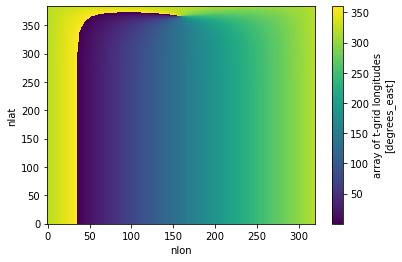

In [3]:
ds.TLONG.plot()

In [4]:
dsp = util.pop_add_cyclic(ds)
dsp

<xarray.Dataset>
Dimensions:   (month: 12, nlat: 384, nlon: 321, z_t: 60, z_t_150m: 15)
Coordinates:
  * z_t       (z_t) float32 500.0 1500.0 2500.0 ... 487508.34 512502.8 537500.0
  * month     (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * z_t_150m  (z_t_150m) float32 500.0 1500.0 2500.0 ... 12500.0 13500.0 14500.0
Dimensions without coordinates: nlat, nlon
Data variables:
    TLAT      (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 80.31 80.31 80.31
    TLONG     (nlat, nlon) float64 -220.6 -219.4 -218.3 ... -39.29 -39.57 -39.86
    Chl_surf  (month, nlat, nlon) float32 nan nan nan nan ... nan nan nan nan
    KMT       (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SST       (month, nlat, nlon) float32 nan nan nan nan ... nan nan nan nan
    TAREA     (nlat, nlon) float64 8.592e+12 8.592e+12 ... 3.342e+12 3.341e+12
    dz        (z_t) float32 1000.0 1000.0 1000.0 ... 24996.244 24998.11

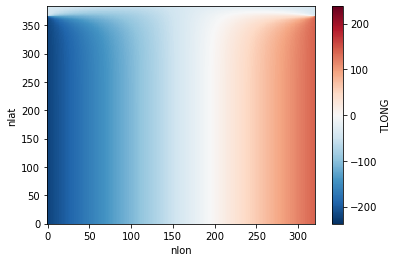

In [5]:
dsp.TLONG.plot()

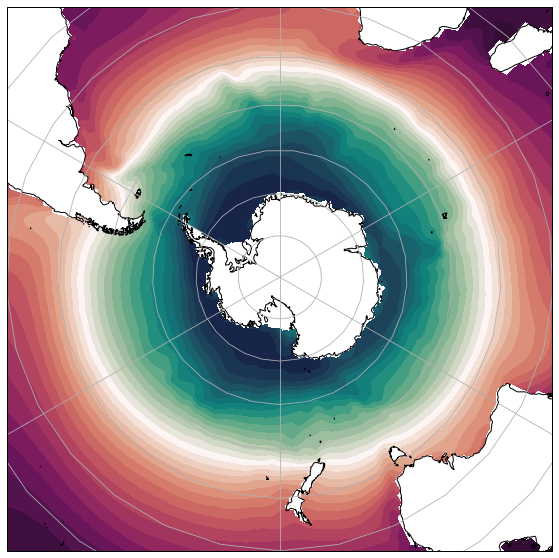

In [6]:
lon, lat = dsp.TLONG.isel(nlat=slice(0, 200)), dsp.TLAT.isel(nlat=slice(0, 200)) 
field = dsp.SST.isel(month=0, nlat=slice(0, 200))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())
ax.set_extent([180, -180, -90,  -30], crs=ccrs.PlateCarree())


cmap = cmocean.cm.curl
levels = np.arange(-2, 30, 1)

cf = ax.contourf(lon, lat, field,
                 cmap=cmap,
                 extend='both',
                 levels=levels,
                 transform=ccrs.PlateCarree())

ax.coastlines('50m')
ax.gridlines()